<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/Temporal_permutation_test_N170data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temporal permutation test

ある一つの電極に関して、時間帯を決める


## Importing libraries

In [ ]:
!pip install mne

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import mne
import pickle
from scipy import stats

## Importing data and create df

In [91]:
### 参加者リストを作る

# Participant list
last_par_num = 28
excluded_pars = ["s10"]

participants = []

for n in range(1, last_par_num+1):
  participants.append("s" + str(n))

for excluded_par in excluded_pars:
  participants.remove(excluded_par)

print(participants)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28']


In [92]:
# Import each participant's csv (time * electrode) and add it to df_list (list of data frame)

df_list_cond1 = []
df_list_cond2 = []

for n, par in enumerate(participants, start=1):
  df_cond1 = pd.read_csv("happy_" + par + "_ERP_Smile 0 .txt", delimiter='\t', index_col=0, header=None)
  df_cond2 = pd.read_csv("happy_" + par + "_ERP_Smile 3 .txt", delimiter='\t', index_col=0, header=None)
  df_list_cond1.append(df_cond1.transpose())
  df_list_cond2.append(df_cond2.transpose())

"""
# Now we have a df_list that contains df (time * electrode) for each participant. For future use, I save it using pickle.
with open('my_list.pkl', 'wb') as file:
    pickle.dump(df_lisdf[0t, file)
"""

"""
# To open it ... (maybe loaded df_list should be renamed as df_list)
with open('my_list.pkl', 'rb') as file:
    loaded_df_list = pickle.load(file)
"""

"\n# To open it ... (maybe loaded df_list should be renamed as df_list)\nwith open('my_list.pkl', 'rb') as file:\n    loaded_df_list = pickle.load(file)\n"

In [94]:
# 出力チェック
display(df_list_cond1[10])

,time,VEOGL,HEOGL,HEOGR,Fp1,Fp2,F7,F3,Fz,F4,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Ref
1,-100.0,0.0020,0.0323,-0.1655,-0.1659,-0.2964,0.1436,0.4518,0.6335,0.2106,...,1.0701,0.2716,0.5101,1.1864,1.2658,1.0898,0.4586,0.8288,1.0727,0.0
2,-96.0,-0.0022,0.0268,-0.1046,-0.1594,-0.1789,0.1225,0.4889,0.6806,0.2814,...,1.1520,0.1639,0.4156,1.0264,1.1426,1.1034,0.3706,0.7617,1.0415,0.0
3,-92.0,-0.0155,-0.0001,-0.0388,-0.1058,-0.0915,0.0767,0.4938,0.6980,0.3299,...,1.1320,0.0167,0.3038,0.8137,0.9383,1.0169,0.2559,0.6261,0.9104,0.0
4,-88.0,-0.0335,-0.0402,0.0286,-0.0145,-0.0503,0.0272,0.4786,0.6901,0.3763,...,1.0035,-0.1635,0.1719,0.5540,0.6652,0.8336,0.1096,0.4193,0.6827,0.0
5,-84.0,-0.0528,-0.0825,0.0908,0.0850,-0.0537,-0.0113,0.4500,0.6586,0.4309,...,0.7851,-0.3661,0.0203,0.2648,0.3477,0.5749,-0.0675,0.1567,0.3795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,484.0,-0.6427,0.0006,-1.5166,-0.5169,0.2336,-0.4260,-0.9247,-0.3921,-0.1411,...,-2.7221,-1.2032,-1.4389,-0.6607,-1.1980,-3.9603,-1.3671,-1.6527,-2.5868,0.0
148,488.0,-0.6976,-0.0293,-1.3993,-0.8309,0.1497,-0.7404,-1.2757,-0.6549,-0.4129,...,-3.0895,-1.7514,-2.1967,-1.3198,-1.8612,-4.4792,-1.9417,-2.1491,-3.1252,0.0
149,492.0,-0.7339,-0.0252,-1.2534,-1.0443,0.1401,-0.9815,-1.5273,-0.8120,-0.5940,...,-3.3554,-2.1547,-2.7247,-1.7755,-2.3160,-4.8400,-2.3400,-2.4514,-3.4702,0.0
150,496.0,-0.7612,-0.0018,-1.0871,-1.1213,0.2028,-1.1523,-1.6842,-0.8635,-0.6514,...,-3.4931,-2.4007,-3.0024,-2.0211,-2.5507,-5.0214,-2.5411,-2.5592,-3.6143,0.0


In [95]:
# Extract specific time_range
t_min = 150
t_max = 250

cond1_list = []
cond2_list = []

for n, par in enumerate(participants, start=0):
  df_epoched_cond1 = df_list_cond1[n][(df_list_cond1[n]["time"] >= t_min) & (df_list_cond1[n]["time"] <= t_max)]
  df_epoched_cond2 = df_list_cond2[n][(df_list_cond2[n]["time"] >= t_min) & (df_list_cond2[n]["time"] <= t_max)]

  # Electrode & condition
  cond1_par = df_epoched_cond1["P8"].to_list()
  cond2_par = df_epoched_cond2["P8"].to_list()

  # Add this participant list to grand_list (containing all participants' list)
  cond1_list.append(cond1_par)
  cond2_list.append(cond2_par)

# Now, cond1_list is a list of list (i.e., 2d) and its shape is (participant, time point) for condition 1

In [ ]:
cond1_list

## More realistic demo data

In [ ]:
df_demo = pd.read_csv("smile_ERP_wo_s10.csv")
df_demo.head()

,time,chair_P7,chair_P8,smile0_P7,smile0_P8,smile1_P7,smile1_P8,smile2_P7,smile2_P8,smile3_P7,...,chair_PO7,chair_PO8,smile0_PO7,smile0_PO8,smile1_PO7,smile1_PO8,smile2_PO7,smile2_PO8,smile3_PO7,smile3_PO8
0,-100,0.1536,0.0204,0.2574,0.1986,0.2169,0.0775,0.1037,-0.0602,0.2317,...,0.0107,0.0569,0.2981,0.1433,0.1324,0.0104,0.0447,-0.1433,0.1859,0.1389
1,-96,0.1495,0.0896,0.2819,0.2422,0.2526,0.1038,0.1089,-0.0284,0.2074,...,0.0112,0.1657,0.3390,0.1671,0.1870,0.0732,0.0502,-0.0773,0.1688,0.1381
2,-92,0.1524,0.1686,0.3001,0.2873,0.2884,0.1372,0.0993,0.0020,0.1706,...,0.0215,0.2702,0.3752,0.2017,0.2508,0.1461,0.0411,-0.0188,0.1415,0.1325
3,-88,0.1615,0.2553,0.3055,0.3239,0.3212,0.1708,0.0783,0.0244,0.1269,...,0.0433,0.3658,0.3979,0.2401,0.3174,0.2162,0.0241,0.0200,0.1048,0.1271
4,-84,0.1733,0.3408,0.2939,0.3406,0.3483,0.1981,0.0525,0.0345,0.0842,...,0.0755,0.4471,0.3981,0.2714,0.3795,0.2711,0.0075,0.0336,0.0621,0.1261


In [ ]:
# extract only one electrode (Here, let's extract P7)

filtered_df = df_demo[(df_demo["time"] >= 150) & (df_demo["time"] <= 250)]

demo_data_real_P8_smile1 = filtered_df["smile1_P8"]
demo_data_real_P8_smile3 = filtered_df["smile3_P8"]

demo_cond1 = demo_data_real_P8_smile1.to_list()
demo_cond2 = demo_data_real_P8_smile3.to_list()

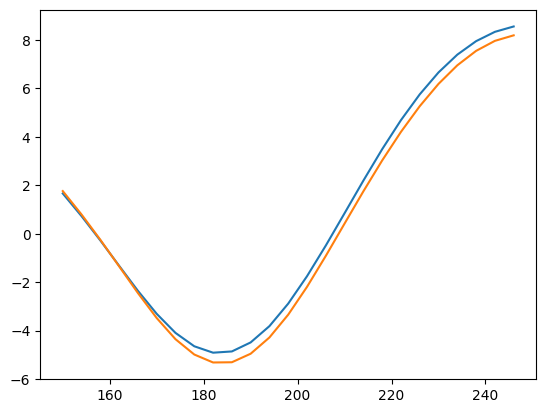

In [ ]:
demo_data_real_P8_smile1.head()
demo_cond1

import matplotlib.pyplot as plt
plt.plot(np.arange(150, 250, 4), demo_cond1)
plt.plot(np.arange(150, 250, 4), demo_cond2)

In [ ]:
list_list1 = []
list_list2 = []

for n in range(10):
  sublist_1 = []
  sublist_2 = []
  for a, b in zip(demo_cond1, demo_cond2):
    num_1 = a + np.random.rand(1)
    num_2 = b + np.random.rand(1)
    sublist_1.append(num_1)
    sublist_2.append(num_2)
  list_list1.append(sublist_1)
  list_list2.append(sublist_2)

condition_1_demo_data = np.array(list_list1)
condition_2_demo_data = np.array(list_list2)

condition_1_demo_data

In [ ]:
# shape(10=N of participants * time_series)
demo_cond1 = demo_data_real_P8_smile1.to_list()
demo_cond2 = demo_data_real_P8_smile3.to_list()

condition_1_demo_data_real =
condition_2_demo_data_real =

print(condition_1_demo_data_real[:3, :5])
print(condition_2_demo_data_real[:3, :5])

https://mne.tools/stable/generated/mne.stats.permutation_cluster_1samp_test.html

## Compute difference, conduct t-test

In [97]:
# Xは、(n_observation, time_series)の型。The first dimension should correspond to the difference between paired samples (observations) in two conditions.
#X = condition_1_demo_data - condition_2_demo_data

cond1 = np.array(cond1_list)
cond2 = np.array(cond2_list)


X = cond1 - cond2

In [ ]:
print(X)

Text(0.5, 0, 'time (ms)')

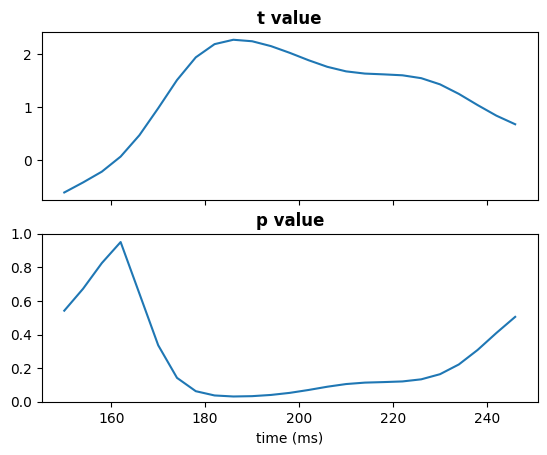

In [100]:
statistic = []
pvalue = []

for time_point in np.arange(150, 250, 4):
  statistic, pvalue = stats.ttest_rel(cond1, cond2)


fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(np.arange(150, 250, 4), statistic)
ax1.set_title("t value", fontweight = "bold")

ax2.plot(np.arange(150, 250, 4), pvalue)
ax2.set_ylim(0, 1)
ax2.set_title("p value", fontweight = "bold")
ax2.set_xlabel('time (ms)')

# MNE python (permutation test)

In [101]:
t_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(X, n_permutations=1000)

Using a threshold of 2.055529
stat_fun(H1): min=-0.618130 max=2.278264
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

## Visualization

[-0.61813005 -0.42769618 -0.22288792  0.06267593  0.46834727  0.98008875
  1.5141125   1.94499418  2.19525139  2.27826398  2.24990364  2.15773392
  2.03034946  1.89042243  1.76517515  1.6787689   1.63675659  1.62197281
  1.60417692  1.54961856  1.43257556  1.25195756  1.0395484   0.83877512
  0.67583006]
[(array([ 8,  9, 10, 11]),)]
[0.127]


Text(0.5, 0, 'time (ms)')

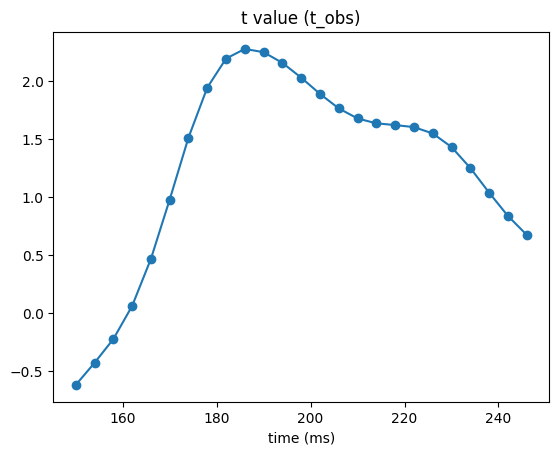

In [105]:
print(t_obs) # observed t-value for each time point
print(clusters) # clusters
print(cluster_pv) # p-value for each clusters identified above
#print(H0)

# Plottign t-values for each time point
import matplotlib.pyplot as plt
plt.plot(np.arange(150, 250, 4), t_obs, marker='o')
plt.title("t value (t_obs)")
plt.xlabel("time (ms)")

cluster: 182~198 ms


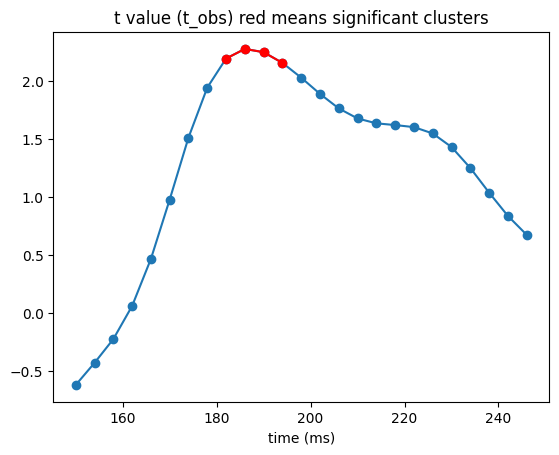

In [106]:
result = [item[0].tolist() for item in clusters if item[0].size > 0]

#epoched_time_series = df_epoched_cond1["time"]

start = result[0][0]
stop = result[0][-1]

plt.plot(np.arange(150, 250, 4), t_obs, marker='o')
plt.plot(np.arange(150, 250, 4)[start:stop+1], t_obs[start:stop+1], marker='o', color="red")
plt.title("t value (t_obs) red means significant clusters")
plt.xlabel("time (ms)")

start = np.arange(150, 250, 4)[start]
stop = np.arange(150, 250, 4)[stop+1]

print(f"cluster: {start}~{stop} ms")